In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
players = pd.read_excel("playerstats.xlsx")
teamtotals = pd.read_excel("teamstats.xlsx",sheet_name="Team Totals")
teampergame = pd.read_excel("teamstats.xlsx",sheet_name="Team per game")
teamper100 = pd.read_excel("teamstats.xlsx",sheet_name="Team per 100")
teamadv = pd.read_excel("teamstats.xlsx",sheet_name="Team Advanced Stats")
teamshooting = pd.read_excel("teamstats.xlsx",sheet_name="Team Shooting stats")

In [4]:
teamshooting.head()

,Rk,Team,G,MP,FG%,Dist.,2P % of FGA by Distance,0 to 3 % of FGA by Distance,3 to 10 % of FGA by Distance,10 to 16 % of FGA by Distance,...,2P % of FG Ast'd,3P % of FG Ast'd,%FGA Dunks,Md. Dunks,%FGA Layups,Md. Layups,%3PA Corner,3P% Corner,Att. Heaves,Md. Heaves
0,1,Atlanta Hawks*,72,17405,0.468,13.9,0.618,0.259,0.178,0.119,...,0.504,0.791,0.065,368,0.252,818,0.207,0.400,9.0,0.0
1,2,Boston Celtics*,72,17380,0.466,14.7,0.591,0.218,0.208,0.094,...,0.478,0.746,0.054,307,0.263,941,0.191,0.393,16.0,0.0
2,3,Brooklyn Nets*,72,17405,0.494,14.1,0.587,0.271,0.164,0.097,...,0.536,0.795,0.062,357,0.261,936,0.220,0.408,9.0,0.0
3,5,Charlotte Hornets,72,17355,0.455,14.2,0.578,0.283,0.166,0.071,...,0.589,0.831,0.063,355,0.281,907,0.221,0.421,11.0,0.0
4,4,Chicago Bulls,72,17380,0.476,13.8,0.617,0.275,0.178,0.085,...,0.549,0.838,0.048,281,0.282,1021,0.231,0.427,13.0,1.0


In [6]:
teamtotals["abb"] = ["ATL",
"BOS",
"BKN",
"CHA",
"CHI",
"CLE",
"DAL",
"DEN",
"DET",
"GSW",
"HOU",
"IND",
"AVG",
"LAC",
"LAL",
"MEM",
"MIA",
"MIL",
"MIN",
"NOP",
"NYK",
"OKC",
"ORL",
"PHI",
"PHO",
"POR",
"SAC",
"SAS",
"TOR",
"UTH",
"WAS"
]

teamshooting["abb"] = teamtotals["abb"]
teamadv["abb"] = teamtotals["abb"]
teampergame["abb"] = teamtotals["abb"]

In [7]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

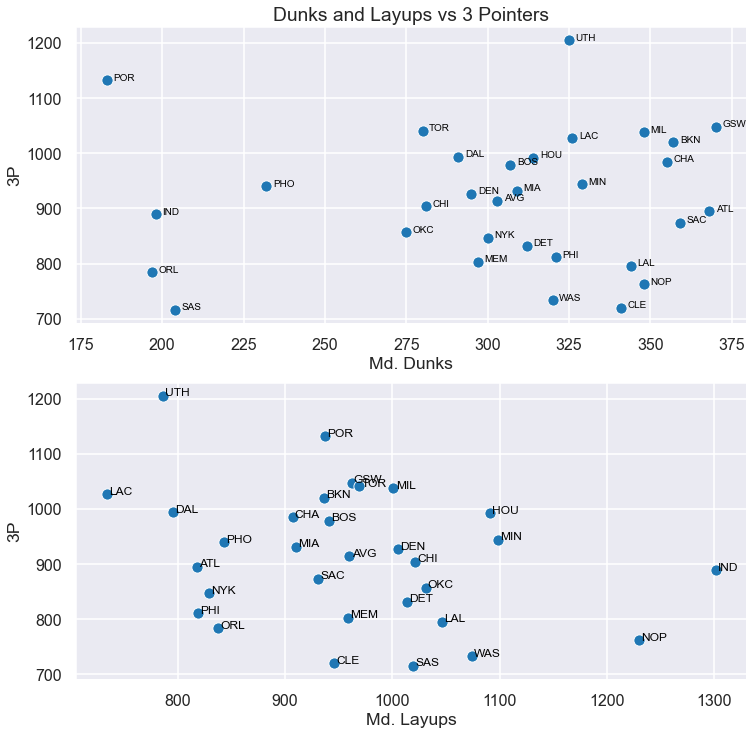

In [50]:
## Dunks vs 3pts
style.use("seaborn-poster")
#style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (12,12))
#sns.set_style(style="dark")
sns.scatterplot(data = teamtotals, x = teamshooting["Md. Dunks"],y = teamtotals["3P"],ax = ax1,palette="RdYlBu" )

for line in range(teamtotals.shape[0]):
    ax1.text(teamshooting["Md. Dunks"][line]+2, teamtotals["3P"][line], teamtotals.abb[line], horizontalalignment='left', size='medium', color='black')
    ax1.set_title("Dunks and Layups vs 3 Pointers")

#sns.scatterplot(data = teamtotals, x = teamshooting["Md. Layups"],y = teamtotals["3P"],ax = ax )
#for line in range(teamtotals.shape[0]):
#     plt.text(teamshooting["Md. Layups"][line]+0.5, teamtotals["3P"][line], teamtotals.abb[line], horizontalalignment='left', size='medium', color='black')
#plt.show()
sns.scatterplot(data = teamtotals, x = teamshooting["Md. Layups"],y = teamtotals["3P"],ax = ax2,palette="RdYlBu" )
for line in range(teamtotals.shape[0]):
     ax2.text(teamshooting["Md. Layups"][line]+2, teamtotals["3P"][line], teamtotals.abb[line], horizontalalignment='left', size='large', color='black')
plt.savefig("DunksLayups3s.png")
plt.show()




In [8]:
teamshooting.values[0][7:12]

array([0.259, 0.178, 0.119, 0.061, 0.382], dtype=object)

In [19]:
#Shooting breakup
fig,axe= plt.subplots(5,6,figsize = (120,120),tight_layout = True )
fig.set_facecolor("black")
#plt.title(teamshooting.values[0][1],color = "w")
teamct = 0
for i in range(5):
    for j in range(6):
        if(i == 2 and j == 0):
            axe[i][j].pie(data=teamshooting,labels = teamshooting.columns[7:12],autopct='%1.2f%%',x = teamshooting.values[30][7:12],textprops={'color' : "w",'fontsize':30})
            axe[i][j].set_title(teamshooting.values[30][1],color = "white",fontsize = 30)
        else:
            axe[i][j].pie(data=teamshooting,labels = teamshooting.columns[7:12],autopct='%1.2f%%',x = teamshooting.values[teamct][7:12],textprops={'color' : "w",'fontsize':30})
            axe[i][j].set_title(teamshooting.values[teamct][1],color = "white",fontsize = 30)
        
        #axe[i][j].legend(labels=teamshooting.columns[7:12], loc="center left", bbox_to_anchor = (3,3))
        teamct += 1

plt.savefig("teamplots/FG split vs Distance.png",facecolor = "black")
plt.show()
#for line in range(teamtotals.shape[0]):
#     ax2.text(teamshooting["Md. Layups"][line]+2, teamtotals["3P"][line], teamtotals.abb[line], horizontalalignment='left', size='large', color='black')


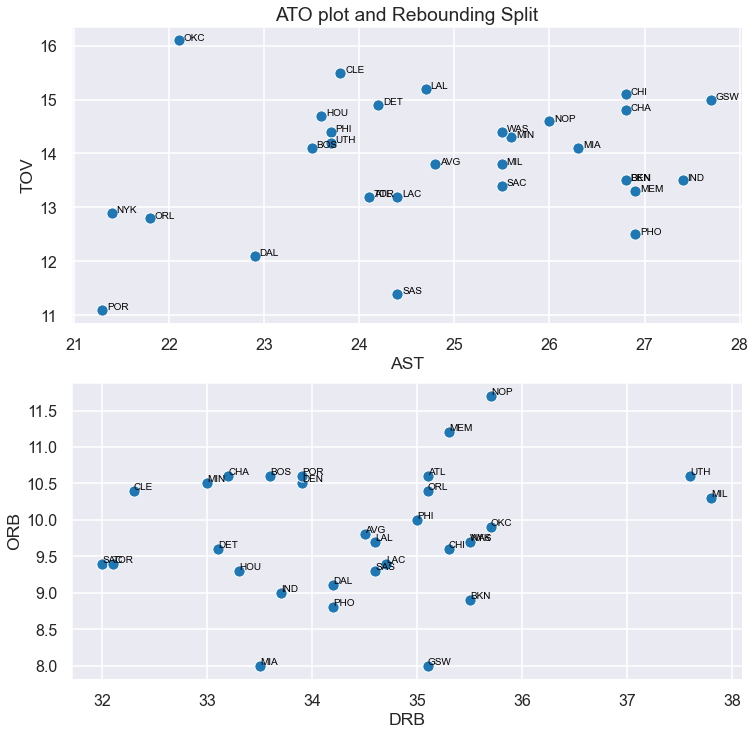

In [51]:
# AST to TOV viz and REB split
style.use("seaborn-poster")
fig,(ax3,ax4) = plt.subplots(2,1,figsize = (12,12))
sns.set_style(style="darkgrid")
sns.scatterplot(data = teampergame, x = teampergame["AST"],y = teampergame["TOV"],ax = ax3,palette="RdYlBu" )

for line in range(teamtotals.shape[0]):
    ax3.text(teampergame["AST"][line]+0.05, teampergame["TOV"][line], teamtotals.abb[line], horizontalalignment='left', size='medium', color='black')
    ax3.set_title("ATO plot and Rebounding Split")

sns.scatterplot(data = teampergame, x = teampergame["DRB"],y = teampergame["ORB"],ax = ax4,palette="inferno" )

for line in range(teamtotals.shape[0]):
    ax4.text(teampergame["DRB"][line], teampergame["ORB"][line]+0.02, teamtotals.abb[line], horizontalalignment='left', size='medium', color='black')
plt.savefig("ATO ratio and REBsplit.png")
plt.show()


# Some insights from the above vizs
GSW generating so many open dunks, need to shoot more. Utah the perfect reg ssn offence.
MIL and UTA rebounding on another tier - Giannis/Portis/Khris and Gobert/Royce. 
POR shockingly low on assists and Turnovers. Golden State best passing team but quite mistake prone, as expected. Also other teams known to play good ball, CHA, BKN, PHO feature in the middle right to bottom right, which is the best quadrant to be in. Spurs still such a great passing team.

